In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("OSX_DS_assignment.csv")

In [4]:
df.isna().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

In [5]:
df['country'].value_counts()

US                48153
France            19932
Italy             11370
Portugal           4038
Chile              3630
Spain              3438
Argentina          3204
Austria            2413
Germany            1944
New Zealand        1398
Australia          1291
South Africa        906
Israel              398
Canada              212
Greece              192
Bulgaria            118
Romania             100
England              74
Slovenia             58
Mexico               54
Hungary              50
Moldova              43
Uruguay              40
Turkey               38
Brazil               37
Lebanon              33
Morocco              23
Georgia              17
Croatia              16
Ukraine              12
Peru                 12
Cyprus                8
Serbia                6
Macedonia             6
Luxembourg            5
Czech Republic        5
Switzerland           5
India                 2
Slovakia              1
Armenia               1
Name: country, dtype: int64

In [6]:
count_variety = df['variety'].value_counts()
count_variety

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

<h3>Review Title and Variety</h3>
<p>On a mild exploration of the feature : review_title, there seems to be a significant relationship between this feature and 'variety'</p>

In [7]:
df

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir
...,...,...,...,...,...,...,...,...,...,...,...,...
103317,NaN,Germany,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Dr. H. Thanisch (Erben Müller-Burggraef),Riesling
103318,@paulgwine,US,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Citation,Pinot Noir
103319,@vossroger,France,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser,Gewürztraminer
103320,@vossroger,France,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Domaine Marcel Deiss,Pinot Gris


1. Dropping the column user_name, as it does not influence the variety of the wine.<p>
Considering that the reviews of the user_name entities are credible the user_name itself will not influence the variety of the wine and since the points given by the review are credible, we can drop the user_name column.

In [8]:
features_with_na=[features for features in df.columns if df[features].isna().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' missing values')

user_name 0.2336  missing values
country 0.0004  missing values
designation 0.2868  missing values
price 0.0674  missing values
province 0.0004  missing values
region_1 0.1555  missing values
region_2 0.5658  missing values


In [9]:
df.drop(columns=['user_name'], inplace=True)

In [10]:
df['country'].isna().sum()

39

In [11]:
to_be_dropped = df.loc[df['country'].isna()]
to_be_dropped

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
2458,NaN,Barton & Guestier NV Partager Red,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Barton & Guestier,Red Blend
7568,NaN,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Tsililis,White Blend
7757,NaN,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Ross-idi,Chardonnay
9005,NaN,Barton & Guestier NV Partager White,"Light and fruity, this is a wine that has some...",Partager,82,NaN,NaN,NaN,NaN,Barton & Guestier,White Blend
11135,NaN,St. Donat 2013 Márga White,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,St. Donat,White Blend
13323,NaN,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Winemaker: Bartho Eksteen. This wooded Sauvy s...,Cape Winemakers Guild Vloekskoot Wooded,91,NaN,NaN,NaN,NaN,Bartho Eksteen,Sauvignon Blanc
21020,NaN,Undurraga 2016 Aliwen Reserva Sauvignon Blanc,Balanced aromas of green herbs and citrus zest...,Aliwen Reserva,87,12.0,NaN,NaN,NaN,Undurraga,Sauvignon Blanc
22073,NaN,Mt. Beautiful 2014 Pinot Gris,"This is a reasonably rich, concentrated exampl...",NaN,86,19.0,NaN,NaN,NaN,Mt. Beautiful,Pinot Gris
28661,NaN,Orbelus 2012 Hrumki Melnik 55 Mourvèdre Marsel...,An interesting blend of indigenous Bulgarian a...,Hrumki Melnik 55 Mourvèdre Marselan,89,25.0,NaN,NaN,NaN,Orbelus,Red Blend
30918,NaN,Bachelder 2014 Wismer-Parke Vineyard Pinot Noir,"Scents of clover, stem, green herb and red cur...",Wismer-Parke Vineyard,89,34.0,NaN,NaN,NaN,Bachelder,Pinot Noir


In [12]:
count_dropped = to_be_dropped['variety'].value_counts()
count_dropped

Red Blend                11
White Blend               6
Sauvignon Blanc           4
Chardonnay                3
Pinot Gris                3
Pinot Noir                3
Cabernet Sauvignon        2
Riesling                  1
Rosé                      1
Gewürztraminer            1
Rhône-style Red Blend     1
Cabernet Franc            1
Tempranillo               1
Merlot                    1
Name: variety, dtype: int64

In [13]:
ratios = []
for i in count_dropped:
    ratios.append((count_dropped[i]/count_variety[i])*100)
ratios

[0.036845983787767135,
 0.040265753976243206,
 0.04338394793926247,
 0.0335345405767941,
 0.0335345405767941,
 0.0335345405767941,
 0.04222972972972973,
 0.05105079554156385,
 0.05105079554156385,
 0.05105079554156385,
 0.05105079554156385,
 0.05105079554156385,
 0.05105079554156385,
 0.05105079554156385]

Since the count of variety in the NaN feature corresponding the variety in overall dataset is insignificant, it can be dropped to handle the null values.

In [14]:
df.dropna(subset=['country'], inplace=True)

In [15]:
df.isna().sum()

country                   0
review_title              0
review_description        0
designation           29631
points                    0
price                  6959
province                  0
region_1              16029
region_2              58420
winery                    0
variety                   0
dtype: int64

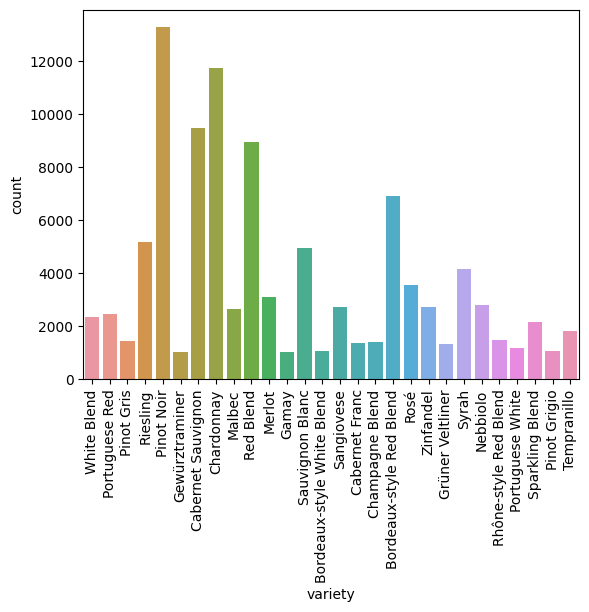

In [16]:
sns.countplot(data=df, x='variety')
plt.xticks(rotation=90)
plt.show()

In [17]:
# df.drop(columns=['designation'], inplace=True)

In [18]:
varieties = count_variety.keys()

In [19]:
varieties

Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah',
       'Rosé', 'Merlot', 'Nebbiolo', 'Zinfandel', 'Sangiovese', 'Malbec',
       'Portuguese Red', 'White Blend', 'Sparkling Blend', 'Tempranillo',
       'Rhône-style Red Blend', 'Pinot Gris', 'Champagne Blend',
       'Cabernet Franc', 'Grüner Veltliner', 'Portuguese White',
       'Bordeaux-style White Blend', 'Pinot Grigio', 'Gamay',
       'Gewürztraminer'],
      dtype='object')

In [20]:
variety = {}

for i in range(len(varieties)):
    variety[varieties[i]] = i
variety

{'Pinot Noir': 0,
 'Chardonnay': 1,
 'Cabernet Sauvignon': 2,
 'Red Blend': 3,
 'Bordeaux-style Red Blend': 4,
 'Riesling': 5,
 'Sauvignon Blanc': 6,
 'Syrah': 7,
 'Rosé': 8,
 'Merlot': 9,
 'Nebbiolo': 10,
 'Zinfandel': 11,
 'Sangiovese': 12,
 'Malbec': 13,
 'Portuguese Red': 14,
 'White Blend': 15,
 'Sparkling Blend': 16,
 'Tempranillo': 17,
 'Rhône-style Red Blend': 18,
 'Pinot Gris': 19,
 'Champagne Blend': 20,
 'Cabernet Franc': 21,
 'Grüner Veltliner': 22,
 'Portuguese White': 23,
 'Bordeaux-style White Blend': 24,
 'Pinot Grigio': 25,
 'Gamay': 26,
 'Gewürztraminer': 27}

In [21]:
df['variety'] = df['variety'].apply(lambda x : variety[x])
df

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,15
1,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,14
2,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,19
3,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,5
4,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,0
...,...,...,...,...,...,...,...,...,...,...,...
103317,Germany,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Dr. H. Thanisch (Erben Müller-Burggraef),5
103318,US,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Citation,0
103319,France,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser,27
103320,France,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Domaine Marcel Deiss,19


In [22]:
country = df['country'].value_counts()

In [23]:
country = country.keys()
countries = {}
for i in range(len(country)):
    countries[country[i]] = i
countries

{'US': 0,
 'France': 1,
 'Italy': 2,
 'Portugal': 3,
 'Chile': 4,
 'Spain': 5,
 'Argentina': 6,
 'Austria': 7,
 'Germany': 8,
 'New Zealand': 9,
 'Australia': 10,
 'South Africa': 11,
 'Israel': 12,
 'Canada': 13,
 'Greece': 14,
 'Bulgaria': 15,
 'Romania': 16,
 'England': 17,
 'Slovenia': 18,
 'Mexico': 19,
 'Hungary': 20,
 'Moldova': 21,
 'Uruguay': 22,
 'Turkey': 23,
 'Brazil': 24,
 'Lebanon': 25,
 'Morocco': 26,
 'Georgia': 27,
 'Croatia': 28,
 'Ukraine': 29,
 'Peru': 30,
 'Cyprus': 31,
 'Serbia': 32,
 'Macedonia': 33,
 'Luxembourg': 34,
 'Czech Republic': 35,
 'Switzerland': 36,
 'India': 37,
 'Slovakia': 38,
 'Armenia': 39}

In [24]:
df['country'] = df['country'].apply(lambda x : countries[x])

In [25]:
df

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,2,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,15
1,3,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,14
2,0,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,19
3,0,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,5
4,0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,0
...,...,...,...,...,...,...,...,...,...,...,...
103317,8,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Dr. H. Thanisch (Erben Müller-Burggraef),5
103318,0,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Citation,0
103319,1,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser,27
103320,1,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Domaine Marcel Deiss,19


In [26]:
df.drop(columns=['region_1','region_2'], inplace=True)

In [27]:
df

,country,review_title,review_description,designation,points,price,province,winery,variety
0,2,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia,15
1,3,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos,14
2,0,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm,19
3,0,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian,5
4,0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks,0
...,...,...,...,...,...,...,...,...,...
103317,8,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef),5
103318,0,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Citation,0
103319,1,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Domaine Gresser,27
103320,1,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Domaine Marcel Deiss,19


In [28]:
df['province'].value_counts()

California    32061
Washington     7579
Bordeaux       5920
Oregon         4917
Tuscany        4785
              ...  
Panciu            1
Requinoa          1
Portugal          1
Armenia           1
Neuchâtel         1
Name: province, Length: 370, dtype: int64

In [29]:
df.corr()

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,country,points,price,variety
country,1.000000,-0.058681,-0.076721,0.090956
points,-0.058681,1.000000,0.415653,-0.074510
price,-0.076721,0.415653,1.000000,-0.105233
variety,0.090956,-0.074510,-0.105233,1.000000


In [30]:
winery_count = df['winery'].value_counts()
print(winery_count)

Testarossa               217
Williams Selyem          203
Louis Latour             199
Georges Duboeuf          195
Chateau Ste. Michelle    187
                        ... 
Weinstock Cellars          1
Onward                     1
Alterra                    1
Hagen Heights              1
Penedo Borges              1
Name: winery, Length: 14718, dtype: int64


In [31]:
price_df = df[['country', 'points', 'variety', 'price']]

In [32]:
valid_price = price_df[price_df['price'].notna()]

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scler = StandardScaler()

In [35]:
valid_price = scler.fit_transform(valid_price)

In [36]:
valid_price

array([[ 0.3331818 , -0.48706157,  0.958875  , -0.50812623],
       [-0.59586793, -0.48706157,  1.6645973 , -0.53145056],
       [-0.59586793, -0.48706157, -0.31142513, -0.55477489],
       ...,
       [-0.28618469,  0.48254525,  2.79375297, -0.1582613 ],
       [-0.28618469,  0.48254525,  1.6645973 , -0.11161264],
       [-0.28618469,  0.48254525,  2.79375297, -0.36818026]])

In [37]:
X = valid_price[:, :-1]
Y = valid_price[:, -1]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
rf_regressor = RandomForestRegressor()

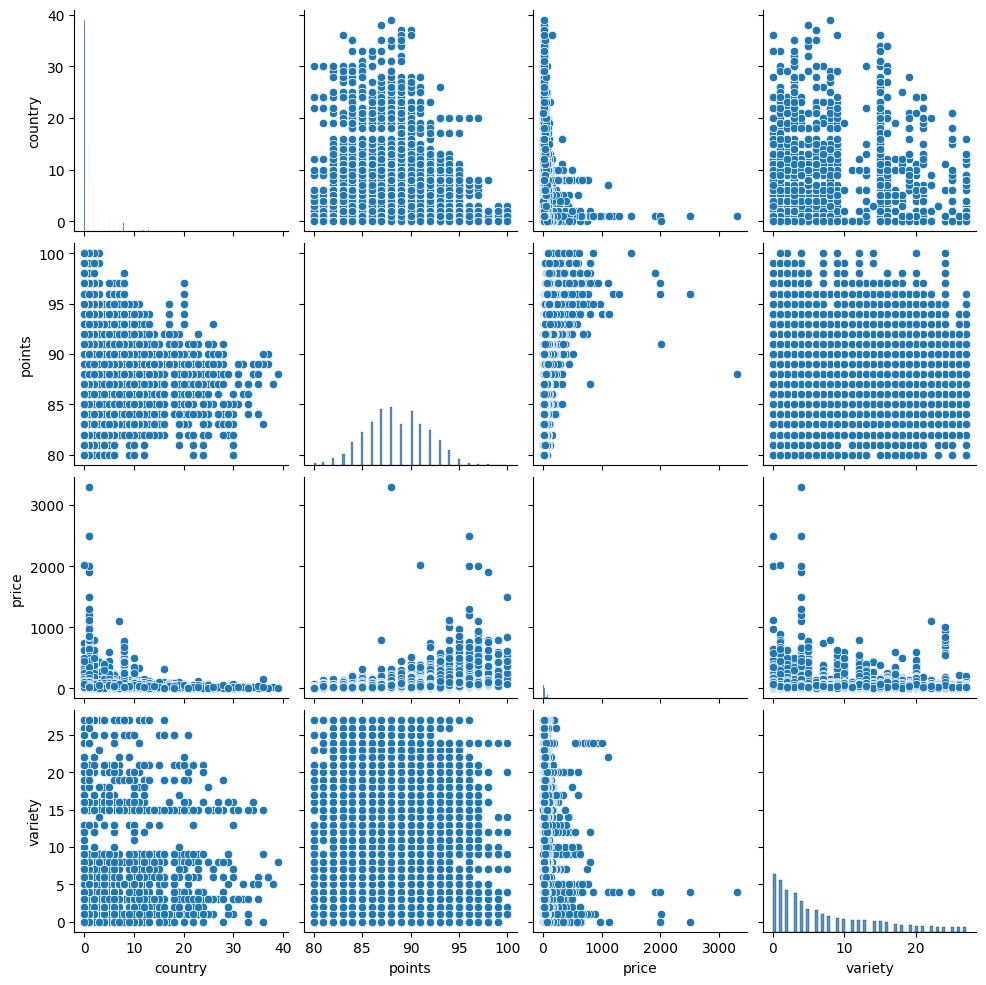

In [42]:
sns.pairplot(df)

In [43]:
df

,country,review_title,review_description,designation,points,price,province,winery,variety
0,2,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia,15
1,3,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos,14
2,0,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm,19
3,0,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian,5
4,0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks,0
...,...,...,...,...,...,...,...,...,...
103317,8,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef),5
103318,0,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Citation,0
103319,1,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Domaine Gresser,27
103320,1,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Domaine Marcel Deiss,19


In [44]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [45]:
df['review_title'] = df['review_title'].apply(str.lower)

In [46]:
df['review_title'] = df['review_title'].apply(word_tokenize)
df

,country,review_title,review_description,designation,points,price,province,winery,variety
0,2,"[nicosia, 2013, vulkà, bianco, (, etna, )]","Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia,15
1,3,"[quinta, dos, avidagos, 2011, avidagos, red, (...","This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos,14
2,0,"[rainstorm, 2013, pinot, gris, (, willamette, ...","Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm,19
3,0,"[st., julian, 2013, reserve, late, harvest, ri...","Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian,5
4,0,"[sweet, cheeks, 2012, vintner, 's, reserve, wi...","Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks,0
...,...,...,...,...,...,...,...,...,...
103317,8,"[dr., h., thanisch, (, erben, müller-burggraef...",Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef),5
103318,0,"[citation, 2004, pinot, noir, (, oregon, )]",Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Citation,0
103319,1,"[domaine, gresser, 2013, kritt, gewurztraminer...",Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Domaine Gresser,27
103320,1,"[domaine, marcel, deiss, 2012, pinot, gris, (,...","A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Domaine Marcel Deiss,19


In [47]:
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

In [48]:
punc_stop = list(string.punctuation)

In [49]:
def rem_stop(tokens):
    return [word for word in tokens if word not in stop_words and word not in punc_stop]

df['review_title'] = df['review_title'].apply(rem_stop)

In [50]:
df

,country,review_title,review_description,designation,points,price,province,winery,variety
0,2,"[nicosia, 2013, vulkà, bianco, etna]","Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia,15
1,3,"[quinta, dos, avidagos, 2011, avidagos, red, d...","This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos,14
2,0,"[rainstorm, 2013, pinot, gris, willamette, val...","Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm,19
3,0,"[st., julian, 2013, reserve, late, harvest, ri...","Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian,5
4,0,"[sweet, cheeks, 2012, vintner, 's, reserve, wi...","Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks,0
...,...,...,...,...,...,...,...,...,...
103317,8,"[dr., h., thanisch, erben, müller-burggraef, 2...",Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef),5
103318,0,"[citation, 2004, pinot, noir, oregon]",Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Citation,0
103319,1,"[domaine, gresser, 2013, kritt, gewurztraminer...",Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Domaine Gresser,27
103320,1,"[domaine, marcel, deiss, 2012, pinot, gris, al...","A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Domaine Marcel Deiss,19


On a closer exploration of the review title, it presents the keywords that are same as the data in the features : 'designation', 'winery' and 'variety'
This is an important insights as it can be directly linked with the dependent features that we are bound to create a predictive model for.

In [51]:
df.isna().sum()

country                   0
review_title              0
review_description        0
designation           29631
points                    0
price                  6959
province                  0
winery                    0
variety                   0
dtype: int64

The feature : 'review title' acts as the primary features and the features : 'designation' and 'winery' are derived from it.
This implies that these features can be dropped.

In [52]:
df.drop(columns=['winery', 'designation'], inplace=True)

In [53]:
df

,country,review_title,review_description,points,price,province,variety
0,2,"[nicosia, 2013, vulkà, bianco, etna]","Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,15
1,3,"[quinta, dos, avidagos, 2011, avidagos, red, d...","This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,14
2,0,"[rainstorm, 2013, pinot, gris, willamette, val...","Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,19
3,0,"[st., julian, 2013, reserve, late, harvest, ri...","Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,5
4,0,"[sweet, cheeks, 2012, vintner, 's, reserve, wi...","Much like the regular bottling from 2012, this...",87,65.0,Oregon,0
...,...,...,...,...,...,...,...
103317,8,"[dr., h., thanisch, erben, müller-burggraef, 2...",Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,5
103318,0,"[citation, 2004, pinot, noir, oregon]",Citation is given as much as a decade of bottl...,90,75.0,Oregon,0
103319,1,"[domaine, gresser, 2013, kritt, gewurztraminer...",Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,27
103320,1,"[domaine, marcel, deiss, 2012, pinot, gris, al...","A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,19


In [54]:
variety_inv = {}
def key_from_dict():
    for i,k in variety.items():
        variety_inv[k] = i
key_from_dict()
variety_inv

{0: 'Pinot Noir',
 1: 'Chardonnay',
 2: 'Cabernet Sauvignon',
 3: 'Red Blend',
 4: 'Bordeaux-style Red Blend',
 5: 'Riesling',
 6: 'Sauvignon Blanc',
 7: 'Syrah',
 8: 'Rosé',
 9: 'Merlot',
 10: 'Nebbiolo',
 11: 'Zinfandel',
 12: 'Sangiovese',
 13: 'Malbec',
 14: 'Portuguese Red',
 15: 'White Blend',
 16: 'Sparkling Blend',
 17: 'Tempranillo',
 18: 'Rhône-style Red Blend',
 19: 'Pinot Gris',
 20: 'Champagne Blend',
 21: 'Cabernet Franc',
 22: 'Grüner Veltliner',
 23: 'Portuguese White',
 24: 'Bordeaux-style White Blend',
 25: 'Pinot Grigio',
 26: 'Gamay',
 27: 'Gewürztraminer'}

In [55]:
df['variety'] = df['variety'].apply(lambda x : variety_inv[x])

In [56]:
df

,country,review_title,review_description,points,price,province,variety
0,2,"[nicosia, 2013, vulkà, bianco, etna]","Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,White Blend
1,3,"[quinta, dos, avidagos, 2011, avidagos, red, d...","This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red
2,0,"[rainstorm, 2013, pinot, gris, willamette, val...","Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris
3,0,"[st., julian, 2013, reserve, late, harvest, ri...","Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Riesling
4,0,"[sweet, cheeks, 2012, vintner, 's, reserve, wi...","Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir
...,...,...,...,...,...,...,...
103317,8,"[dr., h., thanisch, erben, müller-burggraef, 2...",Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Riesling
103318,0,"[citation, 2004, pinot, noir, oregon]",Citation is given as much as a decade of bottl...,90,75.0,Oregon,Pinot Noir
103319,1,"[domaine, gresser, 2013, kritt, gewurztraminer...",Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Gewürztraminer
103320,1,"[domaine, marcel, deiss, 2012, pinot, gris, al...","A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Pinot Gris


In [57]:
df

,country,review_title,review_description,points,price,province,variety
0,2,"[nicosia, 2013, vulkà, bianco, etna]","Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,White Blend
1,3,"[quinta, dos, avidagos, 2011, avidagos, red, d...","This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red
2,0,"[rainstorm, 2013, pinot, gris, willamette, val...","Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris
3,0,"[st., julian, 2013, reserve, late, harvest, ri...","Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Riesling
4,0,"[sweet, cheeks, 2012, vintner, 's, reserve, wi...","Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir
...,...,...,...,...,...,...,...
103317,8,"[dr., h., thanisch, erben, müller-burggraef, 2...",Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Riesling
103318,0,"[citation, 2004, pinot, noir, oregon]",Citation is given as much as a decade of bottl...,90,75.0,Oregon,Pinot Noir
103319,1,"[domaine, gresser, 2013, kritt, gewurztraminer...",Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Gewürztraminer
103320,1,"[domaine, marcel, deiss, 2012, pinot, gris, al...","A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Pinot Gris


In [58]:
final_data = df[['country', 'review_title', 'points', 'price', 'province']]
sentiment_df = df[['review_description', 'points', 'price']]

In [60]:
final_data['province'].value_counts()

California    32061
Washington     7579
Bordeaux       5920
Oregon         4917
Tuscany        4785
              ...  
Panciu            1
Requinoa          1
Portugal          1
Armenia           1
Neuchâtel         1
Name: province, Length: 370, dtype: int64

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [62]:
sentiment_df

,review_description,points,price
0,"Aromas include tropical fruit, broom, brimston...",87,NaN
1,"This is ripe and fruity, a wine that is smooth...",87,15.0
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0
4,"Much like the regular bottling from 2012, this...",87,65.0
...,...,...,...
103317,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0
103318,Citation is given as much as a decade of bottl...,90,75.0
103319,Well-drained gravel soil gives this wine its c...,90,30.0
103320,"A dry style of Pinot Gris, this is crisp with ...",90,32.0


In [63]:
sentiment_df.iloc[2, 0]

'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.'

In [64]:
sia = SentimentIntensityAnalyzer()

In [65]:
sentiments = df['review_description'].apply(lambda x : sia.polarity_scores(x))
sentiments

0         {'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...
1         {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...
2         {'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'comp...
3         {'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'comp...
4         {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...
                                ...                        
103317    {'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...
103318    {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...
103319    {'neg': 0.072, 'neu': 0.865, 'pos': 0.063, 'co...
103320    {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...
103321    {'neg': 0.047, 'neu': 0.723, 'pos': 0.23, 'com...
Name: review_description, Length: 103283, dtype: object

In [66]:
sentiments[2]

{'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'compound': -0.128}

In [67]:
sentiment = []
for i in sentiments:
    sentiment.append(i['compound'])
sentiment
    

[0.1531,
 0.6486,
 -0.128,
 0.34,
 0.8176,
 0.0,
 0.9091,
 0.7506,
 0.8176,
 0.4939,
 0.5574,
 0.1624,
 0.7506,
 0.4404,
 0.5927,
 0.0,
 0.5719,
 0.7269,
 -0.3182,
 0.4019,
 0.743,
 0.4215,
 0.698,
 0.8391,
 -0.25,
 0.0,
 0.0,
 0.6293,
 0.3818,
 -0.0772,
 0.4588,
 0.7845,
 0.0,
 0.2732,
 0.7269,
 0.8316,
 0.93,
 -0.4019,
 0.8442,
 0.7003,
 0.0,
 0.0,
 0.3182,
 -0.1027,
 0.0,
 0.3182,
 0.8176,
 0.5719,
 0.0498,
 0.5106,
 0.8979,
 -0.3182,
 0.743,
 0.5106,
 0.0,
 0.34,
 0.3612,
 0.5106,
 0.0,
 0.4767,
 0.5106,
 0.8519,
 0.6808,
 0.3182,
 0.0,
 0.8481,
 0.4939,
 0.886,
 0.5574,
 0.6597,
 0.6597,
 0.0,
 0.4404,
 0.8481,
 0.0,
 0.3818,
 0.4404,
 0.3182,
 0.3182,
 0.596,
 0.4588,
 0.4404,
 0.8625,
 0.2023,
 0.7206,
 0.0,
 0.0,
 0.5584,
 0.5106,
 0.0,
 0.9732,
 0.5789,
 0.81,
 0.7906,
 0.9451,
 0.8248,
 0.9509,
 0.946,
 0.2111,
 0.979,
 0.5719,
 0.9325,
 0.6486,
 0.9398,
 0.8422,
 0.9709,
 0.3919,
 0.5994,
 0.8426,
 0.4939,
 0.0,
 0.4019,
 0.9386,
 0.3869,
 0.6249,
 0.4404,
 0.9601,
 0.8885,


In [68]:
sentiment_df['sentiment'] = sentiment
sentiment_df

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\1607467933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment'] = sentiment


,review_description,points,price,sentiment
0,"Aromas include tropical fruit, broom, brimston...",87,NaN,0.1531
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,0.6486
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,-0.1280
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,0.3400
4,"Much like the regular bottling from 2012, this...",87,65.0,0.8176
...,...,...,...,...
103317,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,0.7331
103318,Citation is given as much as a decade of bottl...,90,75.0,0.5267
103319,Well-drained gravel soil gives this wine its c...,90,30.0,0.1548
103320,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,0.5267


In [69]:
sentiment_df.corr()

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\385360399.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sentiment_df.corr()


,points,price,sentiment
points,1.000000,0.415653,0.312525
price,0.415653,1.000000,0.073081
sentiment,0.312525,0.073081,1.000000


In [70]:
from textblob import TextBlob

In [71]:
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Add a new column to the DataFrame with sentiment scores for each review
sentiment_df['sentiment_tb'] = sentiment_df['review_description'].apply(get_sentiment)

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\1165719036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment_tb'] = sentiment_df['review_description'].apply(get_sentiment)


In [72]:
sentiment_df

,review_description,points,price,sentiment,sentiment_tb
0,"Aromas include tropical fruit, broom, brimston...",87,NaN,0.1531,1.333333e-01
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,0.6486,2.200000e-01
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,-0.1280,2.500000e-02
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,0.3400,1.666667e-01
4,"Much like the regular bottling from 2012, this...",87,65.0,0.8176,3.066667e-01
...,...,...,...,...,...
103317,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,0.7331,6.000000e-01
103318,Citation is given as much as a decade of bottl...,90,75.0,0.5267,1.387779e-17
103319,Well-drained gravel soil gives this wine its c...,90,30.0,0.1548,8.750000e-02
103320,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,0.5267,1.208333e-01


In [73]:
sentiment_df.corr()

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\385360399.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sentiment_df.corr()


,points,price,sentiment,sentiment_tb
points,1.000000,0.415653,0.312525,0.147183
price,0.415653,1.000000,0.073081,-0.006267
sentiment,0.312525,0.073081,1.000000,0.527917
sentiment_tb,0.147183,-0.006267,0.527917,1.000000


In [74]:
sentiment_df.drop(columns=['review_description'], inplace=True)

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\3865531156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df.drop(columns=['review_description'], inplace=True)


In [75]:
sentiment_df['country'] = df['country']
sentiment_df['variety'] = df['variety'].apply(lambda x : variety[x])
sentiment_df

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\10416692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['country'] = df['country']
C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\10416692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['variety'] = df['variety'].apply(lambda x : variety[x])


,points,price,sentiment,sentiment_tb,country,variety
0,87,NaN,0.1531,1.333333e-01,2,15
1,87,15.0,0.6486,2.200000e-01,3,14
2,87,14.0,-0.1280,2.500000e-02,0,19
3,87,13.0,0.3400,1.666667e-01,0,5
4,87,65.0,0.8176,3.066667e-01,0,0
...,...,...,...,...,...,...
103317,90,28.0,0.7331,6.000000e-01,8,5
103318,90,75.0,0.5267,1.387779e-17,0,0
103319,90,30.0,0.1548,8.750000e-02,1,27
103320,90,32.0,0.5267,1.208333e-01,1,19


In [76]:
sentiment_df_not_na = sentiment_df.loc[sentiment_df['price'].notna()]
sentiment_df_is_na = sentiment_df.loc[sentiment_df['price'].isna()]

In [77]:
sentiment_df_not_na

,points,price,sentiment,sentiment_tb,country,variety
1,87,15.0,0.6486,2.200000e-01,3,14
2,87,14.0,-0.1280,2.500000e-02,0,19
3,87,13.0,0.3400,1.666667e-01,0,5
4,87,65.0,0.8176,3.066667e-01,0,0
5,87,24.0,0.0000,2.333333e-02,1,27
...,...,...,...,...,...,...
103317,90,28.0,0.7331,6.000000e-01,8,5
103318,90,75.0,0.5267,1.387779e-17,0,0
103319,90,30.0,0.1548,8.750000e-02,1,27
103320,90,32.0,0.5267,1.208333e-01,1,19


In [78]:
sentiment_df_not_na

,points,price,sentiment,sentiment_tb,country,variety
1,87,15.0,0.6486,2.200000e-01,3,14
2,87,14.0,-0.1280,2.500000e-02,0,19
3,87,13.0,0.3400,1.666667e-01,0,5
4,87,65.0,0.8176,3.066667e-01,0,0
5,87,24.0,0.0000,2.333333e-02,1,27
...,...,...,...,...,...,...
103317,90,28.0,0.7331,6.000000e-01,8,5
103318,90,75.0,0.5267,1.387779e-17,0,0
103319,90,30.0,0.1548,8.750000e-02,1,27
103320,90,32.0,0.5267,1.208333e-01,1,19


In [79]:
X = sentiment_df_not_na[['points', 'country', 'variety']]
X

,points,country,variety
1,87,3,14
2,87,0,19
3,87,0,5
4,87,0,0
5,87,1,27
...,...,...,...
103317,90,8,5
103318,90,0,0
103319,90,1,27
103320,90,1,19


In [80]:
Y = sentiment_df_not_na[['price']]
Y

,price
1,15.0
2,14.0
3,13.0
4,65.0
5,24.0
...,...
103317,28.0
103318,75.0
103319,30.0
103320,32.0


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

In [82]:
X_train

,points,country,variety
22739,93,0,5
83314,87,0,1
84891,92,0,2
32701,90,4,2
39070,92,1,4
...,...,...,...
71298,92,0,7
49657,85,5,17
51632,91,7,22
75185,86,0,5


In [83]:
rf_regressor.fit(X_train, Y_train)

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\1473937504.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, Y_train)


RandomForestRegressor()

In [84]:
rf_regressor.score(X_test, Y_test)

0.4102917791473991

In [85]:
regressor = LinearRegression()

In [86]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [87]:
regressor.score(X_test,Y_test)

0.185030927414904

In [88]:
sentiment_df_is_na

,points,price,sentiment,sentiment_tb,country,variety
0,87,NaN,0.1531,0.133333,2,15
22,86,NaN,0.6980,0.275000,1,26
23,86,NaN,0.8391,0.095833,2,3
24,86,NaN,-0.2500,0.100000,2,15
37,86,NaN,-0.4019,-0.150000,2,3
...,...,...,...,...,...,...
103196,89,NaN,0.4019,0.126667,2,10
103220,86,NaN,0.7964,0.716667,2,12
103230,90,NaN,0.9136,0.252083,3,14
103233,90,NaN,0.4215,0.055556,3,14


In [89]:
na_X = sentiment_df_is_na[['points', 'country', 'variety']]
na_Y = rf_regressor.predict(na_X)
na_Y

array([20.93965893, 16.901193  , 24.1336286 , ..., 23.0738499 ,
       23.0738499 , 32.60240168])

In [90]:
sentiment_df_is_na['price'] = na_Y

C:\Users\jonua\AppData\Local\Temp\ipykernel_19528\662167707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df_is_na['price'] = na_Y


,points,price,sentiment,sentiment_tb,country,variety
0,87,20.939659,0.1531,0.133333,2,15
22,86,16.901193,0.6980,0.275000,1,26
23,86,24.133629,0.8391,0.095833,2,3
24,86,17.837264,-0.2500,0.100000,2,15
37,86,24.133629,-0.4019,-0.150000,2,3
...,...,...,...,...,...,...
103196,89,58.420160,0.4019,0.126667,2,10
103220,86,30.003481,0.7964,0.716667,2,12
103230,90,23.073850,0.9136,0.252083,3,14
103233,90,23.073850,0.4215,0.055556,3,14


In [91]:
na_Y = list(na_Y)
na_Y

[20.939658926231683,
 16.901192995324855,
 24.133628601057417,
 17.837263573369654,
 24.133628601057417,
 21.219917133175272,
 52.47841473919394,
 23.310844706340443,
 37.36793759020188,
 58.31228215795006,
 58.31228215795006,
 40.369757124809325,
 35.3207107783189,
 49.09427521086345,
 25.407316363377177,
 51.946786065799316,
 51.946786065799316,
 15.523457924758034,
 15.523457924758034,
 15.688648989898994,
 20.939658926231683,
 24.307061597329398,
 25.81017308814057,
 79.36984404446098,
 69.38990280654635,
 69.38990280654635,
 79.36984404446098,
 79.36984404446098,
 29.083665494780522,
 27.46279704513024,
 24.97651182105072,
 30.003480972547404,
 16.901192995324855,
 16.01992098071064,
 56.29754838252435,
 56.29754838252435,
 36.00739086798563,
 23.07384990348854,
 43.670792996375376,
 43.670792996375376,
 43.670792996375376,
 17.93565481740482,
 16.796292929292928,
 33.41247964743257,
 29.745547231265792,
 13.831863443815823,
 21.219917133175272,
 34.28794118381618,
 20.64754218007

In [94]:
final_data = df.copy()

In [95]:
df['price'] = df['price'].fillna(pd.Series(na_Y[:len(df['price'])]))
df

,country,review_title,review_description,points,price,province,variety
0,2,"[nicosia, 2013, vulkà, bianco, etna]","Aromas include tropical fruit, broom, brimston...",87,20.939659,Sicily & Sardinia,White Blend
1,3,"[quinta, dos, avidagos, 2011, avidagos, red, d...","This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,Portuguese Red
2,0,"[rainstorm, 2013, pinot, gris, willamette, val...","Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Pinot Gris
3,0,"[st., julian, 2013, reserve, late, harvest, ri...","Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,Riesling
4,0,"[sweet, cheeks, 2012, vintner, 's, reserve, wi...","Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Pinot Noir
...,...,...,...,...,...,...,...
103317,8,"[dr., h., thanisch, erben, müller-burggraef, 2...",Notes of honeysuckle and cantaloupe sweeten th...,90,28.000000,Mosel,Riesling
103318,0,"[citation, 2004, pinot, noir, oregon]",Citation is given as much as a decade of bottl...,90,75.000000,Oregon,Pinot Noir
103319,1,"[domaine, gresser, 2013, kritt, gewurztraminer...",Well-drained gravel soil gives this wine its c...,90,30.000000,Alsace,Gewürztraminer
103320,1,"[domaine, marcel, deiss, 2012, pinot, gris, al...","A dry style of Pinot Gris, this is crisp with ...",90,32.000000,Alsace,Pinot Gris


In [96]:
df.drop(columns=['review_description'], inplace=True)

In [97]:
df

,country,review_title,points,price,province,variety
0,2,"[nicosia, 2013, vulkà, bianco, etna]",87,20.939659,Sicily & Sardinia,White Blend
1,3,"[quinta, dos, avidagos, 2011, avidagos, red, d...",87,15.000000,Douro,Portuguese Red
2,0,"[rainstorm, 2013, pinot, gris, willamette, val...",87,14.000000,Oregon,Pinot Gris
3,0,"[st., julian, 2013, reserve, late, harvest, ri...",87,13.000000,Michigan,Riesling
4,0,"[sweet, cheeks, 2012, vintner, 's, reserve, wi...",87,65.000000,Oregon,Pinot Noir
...,...,...,...,...,...,...
103317,8,"[dr., h., thanisch, erben, müller-burggraef, 2...",90,28.000000,Mosel,Riesling
103318,0,"[citation, 2004, pinot, noir, oregon]",90,75.000000,Oregon,Pinot Noir
103319,1,"[domaine, gresser, 2013, kritt, gewurztraminer...",90,30.000000,Alsace,Gewürztraminer
103320,1,"[domaine, marcel, deiss, 2012, pinot, gris, al...",90,32.000000,Alsace,Pinot Gris


In [98]:
df['variety'] = df['variety'].apply(str.lower)

In [102]:
df

,country,review_title,points,price,province,variety
0,2,"[nicosia, 2013, vulkà, bianco, etna]",87,20.939659,Sicily & Sardinia,"[white, blend]"
1,3,"[quinta, dos, avidagos, 2011, avidagos, red, d...",87,15.000000,Douro,"[portuguese, red]"
2,0,"[rainstorm, 2013, pinot, gris, willamette, val...",87,14.000000,Oregon,"[pinot, gris]"
3,0,"[st., julian, 2013, reserve, late, harvest, ri...",87,13.000000,Michigan,[riesling]
4,0,"[sweet, cheeks, 2012, vintner, 's, reserve, wi...",87,65.000000,Oregon,"[pinot, noir]"
...,...,...,...,...,...,...
103317,8,"[dr., h., thanisch, erben, müller-burggraef, 2...",90,28.000000,Mosel,[riesling]
103318,0,"[citation, 2004, pinot, noir, oregon]",90,75.000000,Oregon,"[pinot, noir]"
103319,1,"[domaine, gresser, 2013, kritt, gewurztraminer...",90,30.000000,Alsace,[gewürztraminer]
103320,1,"[domaine, marcel, deiss, 2012, pinot, gris, al...",90,32.000000,Alsace,"[pinot, gris]"
